In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=51646871daab3ff3c056d4c43c1aefb754498efdf47c6981980d06dadf3250d9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import gradio as gr

# Load data
file_path = '/content/NOSQL_PROJ.csv'  # Make sure this file path is correct
data = pd.read_csv(file_path)

# Determine rating column
rating_column = 'playtime' if 'rating' not in data.columns else 'rating'

# Prepare data for Surprise library
reader = Reader(rating_scale=(data[rating_column].min(), data[rating_column].max()))
surprise_data = Dataset.load_from_df(data[['user_id', 'game_id', rating_column]], reader)

# Train/test split and model training
trainset, testset = train_test_split(surprise_data, test_size=0.2)
algo = SVD()
algo.fit(trainset)

# Evaluate model
accuracy.rmse(algo.test(testset))

def get_top_n_recommendations(algo, user_id, n=5):
    """Recommend top N games with titles, predicted ratings, and images for a given user."""
    if user_id not in data['user_id'].values:
        return ["User ID not found in the dataset."]

    all_game_ids = data['game_id'].unique()
    rated_games = data[data['user_id'] == user_id]['game_id'].values
    games_to_recommend = [game for game in all_game_ids if game not in rated_games]

    if not games_to_recommend:
        return ["No new games to recommend for this user."]

    predictions = [algo.predict(user_id, game_id) for game_id in games_to_recommend]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    recommendations = []
    for pred in top_n:
        try:
            game_info = data[data['game_id'] == pred.iid][['title', 'image_url']].iloc[0]
            recommendations.append((game_info['image_url'], game_info['title'], f"Predicted Rating: {pred.est:.2f}"))
        except IndexError:
            continue

    return recommendations

def display_recommendations(user_id, n=5):
    """Generate recommendations with titles, ratings, and images as a list for Gradio."""
    recommendations = get_top_n_recommendations(algo, user_id, n)
    if isinstance(recommendations, list):
        # Return a list of tuples containing the image URL, title, and rating
        return [(image_url, f"{title}\n{rating}") for image_url, title, rating in recommendations]
    else:
        return recommendations

# Gradio interface setup
interface = gr.Interface(
    fn=display_recommendations,
    inputs=[gr.Number(label="User ID"), gr.Slider(1, 10, step=1, value=5, label="Number of Recommendations")],
    outputs=gr.Gallery(label="Game Recommendations"),  # Display images in a gallery format
    title="Game Recommendation System",
    description="Enter a User ID to get personalized game recommendations with images."
)

interface.launch()



RMSE: 0.7788
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f274d5ce0453337d9e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Extra trial

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Step 1: Load data
file_path = '/content/NOSQL_PROJ.csv'  # Path to your file
data = pd.read_csv(file_path)

# Check for a column that could serve as a 'rating' (e.g., 'playtime')
if 'rating' not in data.columns:
    # Replace 'rating' with an appropriate column name, e.g., 'playtime'
    rating_column = 'playtime'
else:
    rating_column = 'rating'

# Step 2: Prepare data for Surprise library
# Using the identified rating column for collaborative filtering
reader = Reader(rating_scale=(data[rating_column].min(), data[rating_column].max()))
surprise_data = Dataset.load_from_df(data[['user_id', 'game_id', rating_column]], reader)

# Step 3: Split data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.2)

# Step 4: Build and train the collaborative filtering model
algo = SVD()  # Using Singular Value Decomposition (SVD) for collaborative filtering
algo.fit(trainset)

# Step 5: Evaluate the model
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse}")

# Step 6: Make recommendations for a specific user, with title and image URL
def get_top_n_recommendations(algo, user_id, n=10):
    """Function to recommend top N games for a given user, returning title and image URL."""
    # Get all possible game IDs
    all_game_ids = data['game_id'].unique()
    # Filter out games already rated by the user
    rated_games = data[data['user_id'] == user_id]['game_id']
    games_to_recommend = [game for game in all_game_ids if game not in rated_games]

    # Predict ratings for the unrated games
    predictions = [algo.predict(user_id, game_id) for game_id in games_to_recommend]
    # Sort by estimated rating and select top N
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Retrieve titles and image URLs for the recommended games
    recommendations = []
    for pred in top_n:
        game_info = data[data['game_id'] == pred.iid][['title', 'image_url']].iloc[0]
        recommendations.append((game_info['title'], game_info['image_url'], pred.est))

    return recommendations

# Get top 5 game recommendations for a user with user_id=1
user_id = 1
top_recommendations = get_top_n_recommendations(algo, user_id, n=5)
print(f"Top 5 recommendations for User {user_id}:")
for title, image_url, score in top_recommendations:
    print(f"Title: {title}, Image URL: {image_url}, Predicted Rating: {score}")


RMSE: 0.8418
Model RMSE: 0.8417814776942764
Top 5 recommendations for User 1:
Title: Uncharted 4: A Thief's End, Image URL: https://upload.wikimedia.org/wikipedia/en/4/4c/Uncharted_4_box_artwork.jpg, Predicted Rating: 4.75651358642942
Title: The Legend of Zelda: Breath of the Wild, Image URL: https://upload.wikimedia.org/wikipedia/en/a/a1/The_Legend_of_Zelda_Breath_of_the_Wild.jpg, Predicted Rating: 4.637617849767333
Title: GTA V, Image URL: https://upload.wikimedia.org/wikipedia/en/a/a5/Grand_Theft_Auto_V.png, Predicted Rating: 4.615430482666273
Title: Animal Crossing: New Horizons, Image URL: https://upload.wikimedia.org/wikipedia/en/a/a5/Animal_Crossing_New_Horizons.jpg, Predicted Rating: 4.5649898812690655
Title: Resident Evil Village, Image URL: https://upload.wikimedia.org/wikipedia/en/3/3c/Resident_Evil_Village.png, Predicted Rating: 4.5610991326926476


RMSE: 0.4630
Model RMSE: 0.4629631511453822
Could not load image for The Last of Us Part II: cannot identify image file <_io.BytesIO object at 0x7da3fe0d2840>


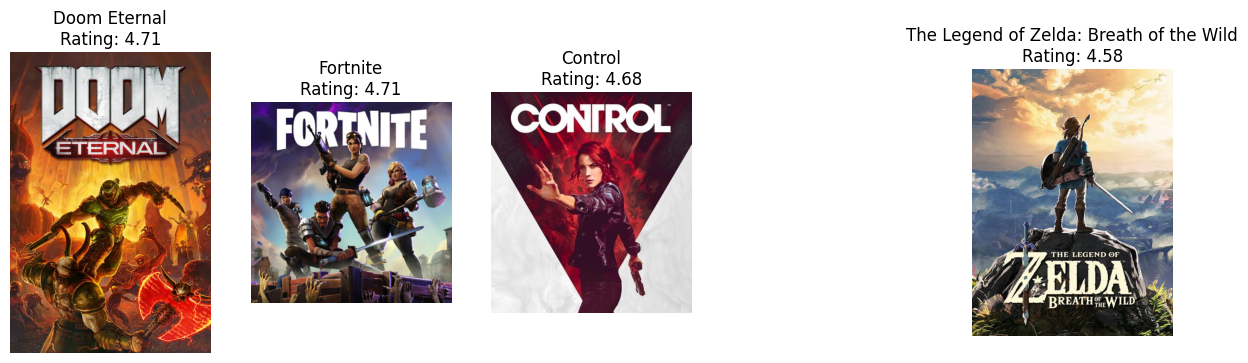

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Step 1: Load data
file_path = '/content/NOSQL_PROJ.csv'  # Path to your file
data = pd.read_csv(file_path)

# Check for a column that could serve as a 'rating' (e.g., 'playtime')
if 'rating' not in data.columns:
    # Replace 'rating' with an appropriate column name, e.g., 'playtime'
    rating_column = 'playtime'
else:
    rating_column = 'rating'

# Step 2: Prepare data for Surprise library
# Using the identified rating column for collaborative filtering
reader = Reader(rating_scale=(data[rating_column].min(), data[rating_column].max()))
surprise_data = Dataset.load_from_df(data[['user_id', 'game_id', rating_column]], reader)

# Step 3: Split data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.2)

# Step 4: Build and train the collaborative filtering model
algo = SVD()  # Using Singular Value Decomposition (SVD) for collaborative filtering
algo.fit(trainset)

# Step 5: Evaluate the model
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse}")

# Step 6: Make recommendations for a specific user, with title and image URL
def get_top_n_recommendations(algo, user_id, n=5):
    """Function to recommend top N games for a given user, returning title and image URL."""
    # Get all possible game IDs
    all_game_ids = data['game_id'].unique()
    # Filter out games already rated by the user
    rated_games = data[data['user_id'] == user_id]['game_id']
    games_to_recommend = [game for game in all_game_ids if game not in rated_games]

    # Predict ratings for the unrated games
    predictions = [algo.predict(user_id, game_id) for game_id in games_to_recommend]
    # Sort by estimated rating and select top N
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Retrieve titles and image URLs for the recommended games
    recommendations = []
    for pred in top_n:
        game_info = data[data['game_id'] == pred.iid][['title', 'image_url']].iloc[0]
        recommendations.append((game_info['title'], game_info['image_url'], pred.est))

    return recommendations

# Function to display images
def display_recommendations_with_images(recommendations):
    """Display the recommended games with images."""
    plt.figure(figsize=(15, 5))
    for i, (title, image_url, score) in enumerate(recommendations):
        try:
            # Fetch and display image
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))
            plt.subplot(1, len(recommendations), i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{title}\nRating: {score:.2f}")
        except Exception as e:
            print(f"Could not load image for {title}: {e}")

    plt.show()

# Get top 5 game recommendations for a user with user_id=1
user_id = 1
top_recommendations = get_top_n_recommendations(algo, user_id, n=5)
display_recommendations_with_images(top_recommendations)


#Gradio


#without image gradio


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import gradio as gr

# Load data
file_path = '/content/test_nosql.csv'  # Make sure this file path is correct
data = pd.read_csv(file_path)

# Determine rating column
rating_column = 'playtime' if 'rating' not in data.columns else 'rating'

# Prepare data for Surprise library
reader = Reader(rating_scale=(data[rating_column].min(), data[rating_column].max()))
surprise_data = Dataset.load_from_df(data[['user_id', 'game_id', rating_column]], reader)

# Train/test split and model training
trainset, testset = train_test_split(surprise_data, test_size=0.2)
algo = SVD()
algo.fit(trainset)

# Evaluate model
accuracy.rmse(algo.test(testset))

def get_top_n_recommendations(algo, user_id, n=5):
    """Recommend top N games with titles for a given user."""
    if user_id not in data['user_id'].values:
        return ["User ID not found in the dataset."]

    all_game_ids = data['game_id'].unique()
    rated_games = data[data['user_id'] == user_id]['game_id'].values
    games_to_recommend = [game for game in all_game_ids if game not in rated_games]

    if not games_to_recommend:
        return ["No new games to recommend for this user."]

    predictions = [algo.predict(user_id, game_id) for game_id in games_to_recommend]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    recommendations = []
    for pred in top_n:
        try:
            game_info = data[data['game_id'] == pred.iid][['title']].iloc[0]
            recommendations.append(f"{game_info['title']} - Predicted Rating: {pred.est:.2f}")
        except IndexError:
            continue

    return recommendations

def display_recommendations(user_id, n=5):
    """Generate recommendations as a list of text outputs for Gradio."""
    recommendations = get_top_n_recommendations(algo, user_id, n)
    if isinstance(recommendations, list):
        return "\n".join(recommendations)
    else:
        return recommendations

# Gradio interface setup
interface = gr.Interface(
    fn=display_recommendations,
    inputs=[gr.Number(label="User ID"), gr.Slider(1, 10, step=1, value=5, label="Number of Recommendations")],
    outputs=gr.Textbox(label="Game Recommendations"),
    title="Game Recommendation System",
    description="Enter a User ID to get personalized game recommendations."
)

interface.launch()


RMSE: 1.0176
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://03f675692f4965c601.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
